# 0. Import all the toolbox needed for preprocessing

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Read file & data wrangling 

In [5]:
df = pd.read_csv('data/train.csv', index_col=False)
pd.set_option('display.max_columns', None)
df.head()

acqic   bacno    cano    conam  contp  csmcu ecfg  etymd flbmk flg_3dsmk  \
0   6881  113261   38038   513.80      5      0    N      0     N         N   
1      0  134508   45725   465.62      5      0    N      2     N         N   
2   6881   15408  188328   513.80      5      0    N      0     N         N   
3   6716  157159   29967  1016.11      5     62    N      5     N         N   
4   5975  105985   81305   713.66      5     62    N      4     N         N   

   fraud_ind  hcefg insfg  iterm  locdt     loctm  mcc  mchno ovrlt  scity  \
0          0      5     N      0     33  172652.0  457  59333     N      0   
1          0      0     N      0      9  105114.0  451      0     N   5817   
2          0      5     N      0      6  152458.0  457  59333     N      0   
3          0      5     N      0      5  172946.0  247  50436     N   3281   
4          0      5     N      0      6  182129.0  263  93775     N   5817   

   stocn  stscd    txkey  
0    102      0   516056  
1    102      0     4376  
2    102      0   483434  
3    102      0  1407164  
4    102      0  1051004

In [6]:
# Name the column into a more readable way

df.columns=['receiver_code','bank_no', 'card_no','money_spent', 'transaction_category', 'currency', 'online_transaction','transaction_type','fallback_mark', '3ds_mark', 'fraud', 'payment_type', 'term_mark', 'terms', 'date', "time", 'mcc', 'merchandise_code', 'over_limit', 'city', 'country', 'situation_code', 'transaction_no']

In [7]:
df.head()

receiver_code  bank_no  card_no  money_spent  transaction_category  \
0           6881   113261    38038       513.80                     5   
1              0   134508    45725       465.62                     5   
2           6881    15408   188328       513.80                     5   
3           6716   157159    29967      1016.11                     5   
4           5975   105985    81305       713.66                     5   

   currency online_transaction  transaction_type fallback_mark 3ds_mark  \
0         0                  N                 0             N        N   
1         0                  N                 2             N        N   
2         0                  N                 0             N        N   
3        62                  N                 5             N        N   
4        62                  N                 4             N        N   

   fraud  payment_type term_mark  terms  date      time  mcc  \
0      0             5         N      0    33  172652.0  457   
1      0             0         N      0     9  105114.0  451   
2      0             5         N      0     6  152458.0  457   
3      0             5         N      0     5  172946.0  247   
4      0             5         N      0     6  182129.0  263   

   merchandise_code over_limit  city  country  situation_code  transaction_no  
0             59333          N     0      102               0          516056  
1                 0          N  5817      102               0            4376  
2             59333          N     0      102               0          483434  
3             50436          N  3281      102               0         1407164  
4             93775          N  5817      102               0         1051004

In [8]:
df.columns

Index(['receiver_code', 'bank_no', 'card_no', 'money_spent',
       'transaction_category', 'currency', 'online_transaction',
       'transaction_type', 'fallback_mark', '3ds_mark', 'fraud',
       'payment_type', 'term_mark', 'terms', 'date', 'time', 'mcc',
       'merchandise_code', 'over_limit', 'city', 'country', 'situation_code',
       'transaction_no'],
      dtype='object')

In [10]:
## Turn money_spent column into float

df['money_spent']=df['money_spent'].apply(float)

In [11]:
## cleaning data

def clean_inf_nan(df):
    return df.replace([np.inf, -np.inf], np.nan)   

# Cleaning infinite values to NaN
df = clean_inf_nan(df)
# Replaceing data
df=df.replace({"Y":1,"N":0})
df=df.replace(np.NaN,0)
# Give index
num = np.arange(len(df))
df['num_index'] = num

# df.info()

In [12]:
# Turn the time column into readable variables

# First turn the time column into string

def time_to_str(data):
    data['time'] = data['time'].apply(str)
    data['time'] = data['time'].apply(lambda x:x.zfill(8))
    data['hr'] = data['time'].str[:2]
    data['date'] = data['date'].apply(float)
    return data

ts = time_to_str(df)
# ts

In [13]:
# Turn the time column into readable variables

def convert_time(data):
    hr = data['time'].str[:2]
    mint=data['time'].str[2:4]
    secd=data['time'].str[4:6]
    data['time']=hr+mint+secd
    data['time1']=pd.to_datetime(data['time'], format='%H%M%S').dt.time
    return (data)


# Write a function to just drop the date
# strf time

data = convert_time(ts)
data.head()

receiver_code  bank_no  card_no  money_spent  transaction_category  \
0           6881   113261    38038       513.80                     5   
1              0   134508    45725       465.62                     5   
2           6881    15408   188328       513.80                     5   
3           6716   157159    29967      1016.11                     5   
4           5975   105985    81305       713.66                     5   

   currency  online_transaction  transaction_type  fallback_mark  3ds_mark  \
0         0                   0                 0            0.0       0.0   
1         0                   0                 2            0.0       0.0   
2         0                   0                 0            0.0       0.0   
3        62                   0                 5            0.0       0.0   
4        62                   0                 4            0.0       0.0   

   fraud  payment_type  term_mark  terms  date    time  mcc  merchandise_code  \
0      0             5          0      0  33.0  172652  457             59333   
1      0             0          0      0   9.0  105114  451                 0   
2      0             5          0      0   6.0  152458  457             59333   
3      0             5          0      0   5.0  172946  247             50436   
4      0             5          0      0   6.0  182129  263             93775   

   over_limit  city  country  situation_code  transaction_no  num_index  hr  \
0           0     0      102               0          516056          0  17   
1           0  5817      102               0            4376          1  10   
2           0     0      102               0          483434          2  15   
3           0  3281      102               0         1407164          3  17   
4           0  5817      102               0         1051004          4  18   

      time1  
0  17:26:52  
1  10:51:14  
2  15:24:58  
3  17:29:46  
4  18:21:29

In [14]:
data.to_csv('data/train1.csv', index=False)

# 2. Looking for hidden variables

## 2.1 Found that certain mcc did seems to been report as fraud

Every business that applies to accept credit cards is assigned a four-digit number by the credit card networks (Visa, MasterCard, Discover, American Express) called a merchant category code, or MCC. The number denotes the type of business or service it is in. Merchant category codes are used by credit card networks to categorize, track or restrict certain types of purchases.

In [19]:
c = data[data.bank_no==36103]
pd.set_option('display.max_rows', None)

In [56]:
c.groupby(['bank_no', 'date', 'time1', 'hr', 'money_spent', 'mcc', 'merchandise_code','city','fraud']).size().to_frame(name='count').reset_index()
c.head()

receiver_code  bank_no  card_no  money_spent  transaction_category  \
17181           3348    36103   100698       504.76                     5   
24546           3348    36103   100698       205.92                     5   
40075           3207    36103   100698       578.02                     5   
40663           3348    36103   100698       254.99                     5   
41933           3207    36103   100698       578.02                     5   

       currency  online_transaction  transaction_type  fallback_mark  \
17181        62                   1                 8            0.0   
24546        62                   1                 8            0.0   
40075        62                   1                 8            0.0   
40663        62                   1                 8            0.0   
41933        62                   1                 8            0.0   

       3ds_mark  fraud  payment_type  term_mark  terms  date    time  mcc  \
17181       0.0      1             5          0      0  48.0  072021  289   
24546       0.0      1             5          0      0  61.0  152052  289   
40075       0.0      1             5          0      0   7.0  210307  218   
40663       0.0      1             5          0      0  10.0  174244  289   
41933       0.0      1             5          0      0   9.0  185037  218   

       merchandise_code  over_limit  city  country  situation_code  \
17181             54828           0  3460       46               0   
24546             54828           0  3460       46               0   
40075             12011           0  5324      104               0   
40663             54828           0  3460       46               0   
41933             12011           0  5324      104               0   

       transaction_no  num_index  hr     time1  
17181          719340      17181  07  07:20:21  
24546          740694      24546  15  15:20:52  
40075          652163      40075  21  21:03:07  
40663          656405      40663  17  17:42:44  
41933          655071      41933  18  18:50:37

In [301]:
data.fraud.sum()

20355

In [60]:
data[data.fraud==1].mcc.value_counts()[:5]

289    3789
380    3403
288    2631
192    2623
203     490
Name: mcc, dtype: int64

In [62]:
z = data[data.fraud==1].mcc.value_counts()

In [63]:
x = data.mcc.value_counts()

In [64]:
len(data.mcc.unique())

434

In [65]:
(z/x).sort_values(ascending=False)[:5]

403    1.0
121    1.0
25     1.0
236    1.0
439    1.0
Name: mcc, dtype: float64

In [247]:
mcc_list = (z/x).sort_values(ascending=False).index
mcc_list[20:40]

Int64Index([360,  72, 235, 345, 213,  61, 320, 216,  43,  63,  17, 424, 408,
            298, 246,  15, 332,  21,  29, 366],
           dtype='int64')

In [250]:
mcclist1 = []
mcclist2 = []
mcclist3 = []
mcclist4 = []

a_list1 = mcc_list[:20]
a_list2 = mcc_list[20:40]
a_list3 = mcc_list[40:60]
a_list4 = mcc_list[60:80]

for i in tqdm(range(0, len(data))):
    if data.mcc.iloc[i] in a_list1:
        mcclist1.append(i)
    if data.mcc.iloc[i] in a_list2:
        mcclist2.append(i)
    if data.mcc.iloc[i] in a_list3:
        mcclist3.append(i)
    if data.mcc.iloc[i] in a_list4:
        mcclist4.append(i)

In [252]:
mcc1 = data.iloc[mcclist1]
mcc2 = data.iloc[mcclist2]
mcc3 = data.iloc[mcclist3]
mcc4 = data.iloc[mcclist4]

In [253]:
data_plot1 = mcc1.groupby(['fraud', 'mcc']).size().reset_index().pivot(columns='fraud', index='mcc', values=0)
data_plot2 = mcc2.groupby(['fraud', 'mcc']).size().reset_index().pivot(columns='fraud', index='mcc', values=0)
data_plot3 = mcc3.groupby(['fraud', 'mcc']).size().reset_index().pivot(columns='fraud', index='mcc', values=0)
data_plot4 = mcc4.groupby(['fraud', 'mcc']).size().reset_index().pivot(columns='fraud', index='mcc', values=0)

With more than 7000 transaction, mcc=288 have a fraud rate around 34%

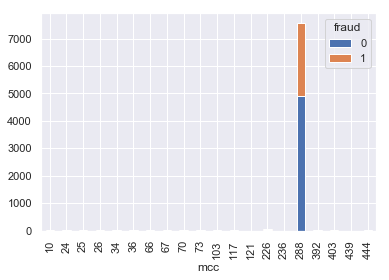

In [254]:
data_plot1.plot(kind='bar', stacked=True);

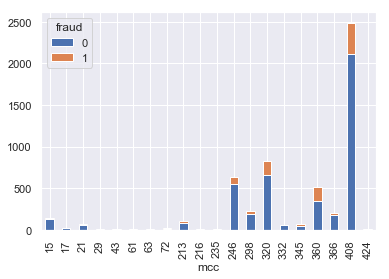

In [255]:
data_plot2.plot(kind='bar', stacked=True);

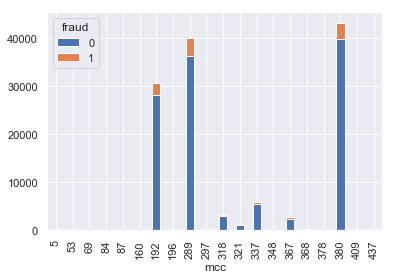

In [256]:
data_plot3.plot(kind='bar', stacked=True);

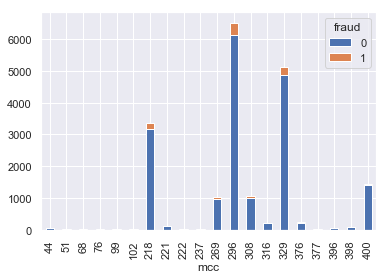

In [257]:
data_plot4.plot(kind='bar', stacked=True);

In [272]:
data.columns

Index(['receiver_code', 'bank_no', 'card_no', 'money_spent',
       'transaction_category', 'currency', 'online_transaction',
       'transaction_type', 'fallback_mark', '3ds_mark', 'fraud',
       'payment_type', 'term_mark', 'terms', 'date', 'time', 'mcc',
       'merchandise_code', 'over_limit', 'city', 'country', 'situation_code',
       'transaction_no', 'num_index', 'hr', 'time1'],
      dtype='object')

In [248]:
mcc_288 = data[data.mcc == 288].groupby(['card_no', 'date', 'time1', 'situation_code', 'money_spent','merchandise_code','fraud']).size().to_frame(name='count').reset_index()

## 2.2 Created an indpenedent dataframe and see if there exist a higher chance of fraud for transactions from same bank account happened in different countries in certain amount of time.

When using groupby, you have to put something for aggregrating , can drop the count column later

In [134]:
time_and_country= data[['date', 'time', 'country','city','fraud', 'time1', 'hr', 'card_no','money_spent']]
test = time_and_country.groupby(['card_no','date','time','time1', 'hr','country','city','money_spent','fraud']).size().to_frame(name='count').reset_index()
test.head()

card_no  date    time     time1  hr  country  city  money_spent  fraud  \
0        0   1.0  151948  15:19:48  15      102  5817       236.43      0   
1        0   4.0  154407  15:44:07  15      102  5817       319.72      0   
2        0  20.0  145342  14:53:42  14      102  5820      1016.34      0   
3        0  29.0  152243  15:22:43  15      102  5817       272.12      0   
4        0  37.0  143710  14:37:10  14      102  5817       283.91      0   

   count  
0      1  
1      1  
2      1  
3      1  
4      1

Here is to filter out the 2 rows that have same date, same bank_no, and the hr diff is within 1 hour, 30mins, 2hrs......, in diff/same country, city, money_spent......

In [143]:
lel = []

from tqdm import tqdm_notebook as tqdm
tqdm().pandas()
for i in tqdm(range(0, len(test)-1)):
    if (test.date.iloc[i+1] - test.date.iloc[i] == 0)\
    & (test.card_no.iloc[i+1] - test.card_no.iloc[i] == 0)\
    & (int(test.time.iloc[i+1]) - int(test.time.iloc[i]) <= 1000)\
    & (test.city.iloc[i+1] != test.city.iloc[i]):
        lel.append(i)
        lel.append(i+1)

In [144]:
in_timeframe = test.iloc[lel]
in_timeframe.head()

card_no  date    time     time1  hr  country  city  money_spent  fraud  \
115         8  62.0  183549  18:35:49  18       38  6580          0.0      0   
116         8  62.0  183924  18:39:24  18      102  5817        591.9      0   
338        49  43.0  201447  20:14:47  20      104  5751          0.0      0   
339        49  43.0  201448  20:14:48  20       38  6580          0.0      0   
1144      253  65.0  215245  21:52:45  21      104     0          0.0      0   

      count  
115       1  
116       1  
338       1  
339       1  
1144      1

Now, going to add another data into the previous one which is for the same bank account with date diff = 1, and hours diff = -23(or mins)

In [145]:
leel = []

for i in tqdm(range(0, len(test)-1)):
    if (test.card_no.iloc[i+1] - test.card_no.iloc[i] == 0)\
    & (test.date.iloc[i+1] - test.date.iloc[i] == 1)\
    & (235000<=(int(test.time.iloc[i]) - int(test.time.iloc[i+1]))<=235959)\
    & (test.city.iloc[i+1] != test.city.iloc[i]):
        leel.append(i)
        leel.append(i+1)

In [146]:
in_timeframe1 = test.iloc[leel]
in_timeframe1.head()

card_no  date    time     time1  hr  country  city  money_spent  \
196840    29158  41.0  235814  23:58:14  23      102  5820         1.38   
196841    29158  42.0  000050  00:00:50  00      102     0       683.25   
249530    37200   7.0  235702  23:57:02  23       27  3323      1174.97   
249531    37200   8.0  000133  00:01:33  00       27  3150      1174.97   
253193    37772  16.0  235650  23:56:50  23      102  5820         1.38   

        fraud  count  
196840      0      1  
196841      0      1  
249530      1      1  
249531      1      1  
253193      0      1

In [147]:
in_timeframe2 = pd.concat([in_timeframe, in_timeframe1])
in_timeframe2.drop_duplicates(keep='first', inplace=True)
in_timeframe2.head()

card_no  date    time     time1  hr  country  city  money_spent  fraud  \
115         8  62.0  183549  18:35:49  18       38  6580          0.0      0   
116         8  62.0  183924  18:39:24  18      102  5817        591.9      0   
338        49  43.0  201447  20:14:47  20      104  5751          0.0      0   
339        49  43.0  201448  20:14:48  20       38  6580          0.0      0   
1144      253  65.0  215245  21:52:45  21      104     0          0.0      0   

      count  
115       1  
116       1  
338       1  
339       1  
1144      1

## Results:

### Without filtering:

In [95]:
data.fraud.sum()/len(data)

0.013375722095142093

### 2HRS, diff country:
Using the hr column to find the fraud rate in two transaction is actually two hour(eg: 15:00:01 ~ 16:59:59)

In [339]:
# 2HRS, different country:
one_hour_fraud2.fraud.sum() / len(one_hour_fraud2)

0.10193535646106247

### 1HRS, diff country:

In [92]:
# 1 hr (using the untransform time column), diff country:
in_timeframe2.fraud.sum() / len(in_timeframe2)

0.11564936141980428

In [ ]:
len(in_timeframe2)

In [93]:
not_in_timeframe = []

for i in tqdm(range(0, len(data))):
    if i not in in_timeframe2.index:
        not_in_timeframe.append(i)

In [96]:
# Not in 1HR diff country:
not_in_timeframe1 = data.iloc[not_in_timeframe]
not_in_timeframe1.fraud.sum()/len(not_in_timeframe1)

0.013370092630490943

### 30mins, diff country

In [108]:
in_timeframe2.fraud.sum() / len(in_timeframe2)

0.1209640537821275

In [ ]:
len(in_timeframe2)

In [109]:
not_in_timeframe = []

for i in tqdm(range(0, len(data))):
    if i not in in_timeframe2.index:
        not_in_timeframe.append(i)

In [110]:
# Not in 30mins diff country:
not_in_timeframe1 = data.iloc[not_in_timeframe]
not_in_timeframe1.fraud.sum()/len(not_in_timeframe1)

0.01336937078686144

### 10mins, diff country

In [117]:
in_timeframe2.fraud.sum() / len(in_timeframe2)

0.12913310724883426

### 5mins, diff country

In [124]:
in_timeframe2.fraud.sum() / len(in_timeframe2)

0.13265012378375265

In [125]:
len(in_timeframe2)

17369

### 1 mins, diff country

In [131]:
in_timeframe2.fraud.sum() / len(in_timeframe2)

0.1206580062129342

In [132]:
len(in_timeframe2)

14164

### 5mins, diff city

In [140]:
in_timeframe2.fraud.sum() / len(in_timeframe2)

0.10419984076433121

In [141]:
len(in_timeframe2)

20096

### 10mins, diff city

In [148]:
in_timeframe2.fraud.sum() / len(in_timeframe2)

0.08004121074321444

In [149]:
len(in_timeframe2)

28148

In [180]:
test.head()

card_no  date    time     time1  hr  country  city  money_spent  fraud  \
0        0   1.0  151948  15:19:48  15      102  5817       236.43      0   
1        0   4.0  154407  15:44:07  15      102  5817       319.72      0   
2        0  20.0  145342  14:53:42  14      102  5820      1016.34      0   
3        0  29.0  152243  15:22:43  15      102  5817       272.12      0   
4        0  37.0  143710  14:37:10  14      102  5817       283.91      0   

   count  
0      1  
1      1  
2      1  
3      1  
4      1

# Diff_city, continue 3 same money_spent

In [211]:
lol = []

from tqdm import tqdm_notebook as tqdm
tqdm().pandas()
for i in tqdm(range(0, len(test)-1)):
    if (test.card_no.iloc[i+1] == test.card_no.iloc[i] == test.card_no.iloc[i-1])\
    & (test.city.iloc[i-1] != test.city.iloc[i] == test.city.iloc[i+1])\
    & (test.money_spent.iloc[i] == test.money_spent.iloc[i+1])\
    & (test.date.iloc[i+1] == test.date.iloc[i] == test.date.iloc[i-1]):
        lol.append(i)
        lol.append(i+1)

In [212]:
lool = []

from tqdm import tqdm_notebook as tqdm
tqdm().pandas()
for i in tqdm(range(0, len(test)-2)):
    if (test.card_no.iloc[i+2] == test.card_no.iloc[i+1] == test.card_no.iloc[i] == test.card_no.iloc[i-1])\
    & (test.city.iloc[i-1] != test.city.iloc[i] == test.city.iloc[i+1] == test.city.iloc[i+2])\
    & (test.money_spent.iloc[i] == test.money_spent.iloc[i+1] == test.money_spent.iloc[i+2])\
    & (test.date.iloc[i+2] == test.date.iloc[i+1] == test.date.iloc[i] == test.date.iloc[i-1]):
        lool.append(i)
        lool.append(i+1)
        lool.append(i+2)

In [214]:
loool = []

from tqdm import tqdm_notebook as tqdm
tqdm().pandas()
for i in tqdm(range(0, len(test)-3)):
    if (test.card_no.iloc[i+3] == test.card_no.iloc[i+2] == test.card_no.iloc[i+1] == test.card_no.iloc[i] == test.card_no.iloc[i-1])\
    & (test.city.iloc[i-1] != test.city.iloc[i] == test.city.iloc[i+1] == test.city.iloc[i+2] == test.city.iloc[i+3])\
    & (test.money_spent.iloc[i] == test.money_spent.iloc[i+1] == test.money_spent.iloc[i+2] == test.money_spent.iloc[i+3])\
    & (test.date.iloc[i+3] == test.date.iloc[i+2] == test.date.iloc[i+1] == test.date.iloc[i] == test.date.iloc[i-1]):
        loool.append(i)
        loool.append(i+1)
        loool.append(i+2)
        loool.append(i+3)

In [215]:
looool = []

from tqdm import tqdm_notebook as tqdm
tqdm().pandas()
for i in tqdm(range(0, len(test)-4)):
    if (test.card_no.iloc[i+4] == test.card_no.iloc[i+3] == test.card_no.iloc[i+2] == test.card_no.iloc[i+1] == test.card_no.iloc[i] == test.card_no.iloc[i-1])\
    & (test.city.iloc[i-1] != test.city.iloc[i] == test.city.iloc[i+1] == test.city.iloc[i+2] == test.city.iloc[i+3] == test.city.iloc[i+4])\
    & (test.money_spent.iloc[i] == test.money_spent.iloc[i+1] == test.money_spent.iloc[i+2] == test.money_spent.iloc[i+3] == test.money_spent.iloc[i+4])\
    & (test.date.iloc[i+4] == test.date.iloc[i+3] == test.date.iloc[i+2] == test.date.iloc[i+1] == test.date.iloc[i] == test.date.iloc[i-1]):
        looool.append(i)
        looool.append(i+1)
        looool.append(i+2)
        looool.append(i+3)
        looool.append(i+4)

In [233]:
loooool = []

from tqdm import tqdm_notebook as tqdm
tqdm().pandas()
for i in tqdm(range(0, len(test)-5)):
    if (test.card_no.iloc[i+5] == test.card_no.iloc[i+4] == test.card_no.iloc[i+3] == test.card_no.iloc[i+2] == test.card_no.iloc[i+1] == test.card_no.iloc[i] == test.card_no.iloc[i-1])\
    & (test.city.iloc[i-1] != test.city.iloc[i] == test.city.iloc[i+1] == test.city.iloc[i+2] == test.city.iloc[i+3] == test.city.iloc[i+4] == test.city.iloc[i+5])\
    & (test.money_spent.iloc[i] == test.money_spent.iloc[i+1] == test.money_spent.iloc[i+2] == test.money_spent.iloc[i+3] == test.money_spent.iloc[i+4] == test.money_spent.iloc[i+5])\
    & (test.date.iloc[i+5] == test.date.iloc[i+4] == test.date.iloc[i+3] == test.date.iloc[i+2] == test.date.iloc[i+1] == test.date.iloc[i] == test.date.iloc[i-1]):
        loooool.append(i)
        loooool.append(i+1)
        loooool.append(i+2)
        loooool.append(i+3)
        loooool.append(i+4)
        loooool.append(i+5)

In [216]:
diff_city_cont2 = test.iloc[lol]
diff_city_cont2.head()

card_no  date    time     time1  hr  country  city  money_spent  fraud  \
1146      253  65.0  215420  21:54:20  21      104     0         0.00      0   
1147      253  65.0  220008  22:00:08  22      104     0         0.00      0   
2077      398  42.0  215349  21:53:49  21       38  6580       106.08      0   
2078      398  42.0  215533  21:55:33  21       38  6580       106.08      0   
5842      861  32.0  163737  16:37:37  16      102     0       513.80      0   

      count  
1146      1  
1147      1  
2077      1  
2078      1  
5842      1

In [217]:
len(diff_city_cont2)

6248

In [218]:
diff_city_cont3 = test.iloc[lool]
diff_city_cont3.head()

card_no  date    time     time1  hr  country  city  money_spent  fraud  \
6563       943  65.0  221733  22:17:33  22       75  6593       932.89      0   
6564       943  65.0  221747  22:17:47  22       75  6593       932.89      0   
6565       943  65.0  221800  22:18:00  22       75  6593       932.89      0   
12580     1684  88.0  174620  17:46:20  17      102     0         0.00      0   
12581     1684  88.0  174622  17:46:22  17      104     0         0.00      0   

       count  
6563       1  
6564       1  
6565       1  
12580      1  
12581      1

In [219]:
len(diff_city_cont3)

1995

In [220]:
diff_city_cont4 = test.iloc[loool]
diff_city_cont4.head()

card_no  date    time     time1  hr  country  city  money_spent  fraud  \
12580     1684  88.0  174620  17:46:20  17      102     0          0.0      0   
12581     1684  88.0  174622  17:46:22  17      104     0          0.0      0   
12582     1684  88.0  174810  17:48:10  17      102     0          0.0      0   
12583     1684  88.0  174812  17:48:12  17      104     0          0.0      0   
16853     2288   2.0  211103  21:11:03  21       38  6580          0.0      0   

       count  
12580      1  
12581      1  
12582      1  
12583      1  
16853      1

In [221]:
len(diff_city_cont4)

1160

In [222]:
diff_city_cont5 = test.iloc[looool]
diff_city_cont5.head()

card_no  date    time     time1  hr  country  city  money_spent  fraud  \
16853     2288   2.0  211103  21:11:03  21       38  6580          0.0      0   
16854     2288   2.0  211112  21:11:12  21       38  6580          0.0      0   
16855     2288   2.0  211216  21:12:16  21       38  6580          0.0      0   
16856     2288   2.0  211450  21:14:50  21       38  6580          0.0      0   
16857     2288   2.0  211859  21:18:59  21       38  6580          0.0      0   

       count  
16853      1  
16854      1  
16855      1  
16856      1  
16857      1

In [223]:
len(diff_city_cont5)

715

In [234]:
diff_city_cont6 = test.iloc[loooool]
diff_city_cont6.head()

card_no  date    time     time1  hr  country  city  money_spent  fraud  \
16853     2288   2.0  211103  21:11:03  21       38  6580          0.0      0   
16854     2288   2.0  211112  21:11:12  21       38  6580          0.0      0   
16855     2288   2.0  211216  21:12:16  21       38  6580          0.0      0   
16856     2288   2.0  211450  21:14:50  21       38  6580          0.0      0   
16857     2288   2.0  211859  21:18:59  21       38  6580          0.0      0   

       count  
16853      1  
16854      1  
16855      1  
16856      1  
16857      1

In [235]:
len(diff_city_cont6)

534

In [224]:
diff_city_cont2_5 = pd.concat([diff_city_cont2, diff_city_cont3, diff_city_cont4, diff_city_cont5])
diff_city_cont2_5.drop_duplicates(keep='first', inplace=True)
diff_city_cont2_5.head()

card_no  date    time     time1  hr  country  city  money_spent  fraud  \
1146      253  65.0  215420  21:54:20  21      104     0         0.00      0   
1147      253  65.0  220008  22:00:08  22      104     0         0.00      0   
2077      398  42.0  215349  21:53:49  21       38  6580       106.08      0   
2078      398  42.0  215533  21:55:33  21       38  6580       106.08      0   
5842      861  32.0  163737  16:37:37  16      102     0       513.80      0   

      count  
1146      1  
1147      1  
2077      1  
2078      1  
5842      1

In [225]:
diff_city_cont2_5.fraud.sum()/len(diff_city_cont2_5)

0.06942553770759598

In [226]:
len(diff_city_cont2_5)

7346

In [244]:
diff_city_cont2_6 = pd.concat([diff_city_cont2, diff_city_cont3, diff_city_cont4, diff_city_cont5, diff_city_cont6])
diff_city_cont2_6.drop_duplicates(keep='first', inplace=True)
diff_city_cont2_6.head()

card_no  date    time     time1  hr  country  city  money_spent  fraud  \
1146      253  65.0  215420  21:54:20  21      104     0         0.00      0   
1147      253  65.0  220008  22:00:08  22      104     0         0.00      0   
2077      398  42.0  215349  21:53:49  21       38  6580       106.08      0   
2078      398  42.0  215533  21:55:33  21       38  6580       106.08      0   
5842      861  32.0  163737  16:37:37  16      102     0       513.80      0   

      count  
1146      1  
1147      1  
2077      1  
2078      1  
5842      1

In [245]:
diff_city_cont2_6.fraud.sum()/len(diff_city_cont2_6)

0.07007397444519166

In [246]:
len(diff_city_cont2_6)

7435

In [236]:
diff_city_cont3_6 = pd.concat([diff_city_cont3, diff_city_cont4, diff_city_cont5, diff_city_cont6])
diff_city_cont3_6.drop_duplicates(keep='first', inplace=True)
diff_city_cont3_6.head()

card_no  date    time     time1  hr  country  city  money_spent  fraud  \
6563       943  65.0  221733  22:17:33  22       75  6593       932.89      0   
6564       943  65.0  221747  22:17:47  22       75  6593       932.89      0   
6565       943  65.0  221800  22:18:00  22       75  6593       932.89      0   
12580     1684  88.0  174620  17:46:20  17      102     0         0.00      0   
12581     1684  88.0  174622  17:46:22  17      104     0         0.00      0   

       count  
6563       1  
6564       1  
6565       1  
12580      1  
12581      1

In [237]:
diff_city_cont3_6.fraud.sum()/len(diff_city_cont3_6)

0.08820023837902265

In [238]:
len(diff_city_cont3_6)

2517

continue 4 same smount fo money

In [230]:
diff_city_cont4.fraud.sum()/len(diff_city_cont4)

0.09051724137931035

continue 5 same smount fo money

In [231]:
diff_city_cont5.fraud.sum()/len(diff_city_cont5)

0.12307692307692308

continue 6 same smount fo money

In [239]:
diff_city_cont6.fraud.sum()/len(diff_city_cont6)

0.13857677902621723

## Hopw it works!

internet transaction lower than 10% per acc, and they all appear to be same money spent

in an amount of time, same money spent 

## 2.3 Mchno(特店代號)：no for each store特約商店代號(mcc is there category)

In [205]:
eason = data.merchandise_code.value_counts()

In [206]:
fu = data[data.fraud==1].merchandise_code.value_counts()

In [72]:
print(test.index)

RangeIndex(start=0, stop=1504982, step=1)


In [13]:
all_data.contp.unique()

array([5, 3, 6, 2, 4, 0, 1])

In [4]:
# pro.cano.value_counts()

In [5]:
pro.fraud_ind.sum()

20355

In [6]:
pro.fraud_ind.sum()/len(pro)

0.013375722095142093

In [7]:
fraudy = pro[pro.fraud_ind == 1]

In [8]:
fraudy.head(5)

acqic   bacno   cano   conam  contp  csmcu ecfg  etymd flbmk flg_3dsmk  \
70     3288   88538  81033    1.38      5     62    Y      8     N         N   
349    6881  157859  82925  513.80      5      0    N      0     N         N   
1133   6769   34663  73355  677.88      5     62    Y      8     N         N   
1208   6856   74183  18151  229.61      5     62    Y      8     N         N   
1254   6881  125183  48320  513.80      5      0    N      0     N         N   

      ...  iterm  locdt     loctm  mcc  mchno  ovrlt  scity  stocn stscd  \
70    ...      0      7   45457.0  337  20984      N    621     93     2   
349   ...      0     23  154137.0  457  59360      N      0    102     0   
1133  ...      0     54  172810.0  373  79663      N   5817    102     0   
1208  ...      0     32  112902.0  288  69240      N      0    104     0   
1254  ...      0     67   45823.0  457  59360      N      0    102     0   

        txkey  
70     651056  
349    503429  
1133   259268  
1208  1423892  
1254   554270  

[5 rows x 23 columns]

In [9]:
fraudy.describe()

acqic          bacno           cano         conam         contp  \
count  20355.000000   20355.000000   20355.000000  20355.000000  20355.000000   
mean    4928.188897   82206.280963  111327.174896    712.266507      4.959420   
std     1541.311437   47308.983282   60761.667642    565.645161      0.207277   
min        0.000000       2.000000      23.000000      0.000000      2.000000   
25%     3348.000000   40111.000000   61213.000000    216.120000      5.000000   
50%     5720.000000   83107.000000  112592.000000    696.350000      5.000000   
75%     6331.000000  122941.000000  165190.000000   1016.340000      5.000000   
max     6883.000000  163864.000000  212152.000000   3353.250000      6.000000   

              csmcu         etymd  fraud_ind         hcefg         iterm  \
count  20355.000000  20355.000000    20355.0  20355.000000  20355.000000   
mean      56.230754      5.542127        1.0      4.999705      0.003635   
std       15.867606      2.946283        0.0      0.237904      0.086907   
min        0.000000      0.000000        1.0      0.000000      0.000000   
25%       61.000000      2.000000        1.0      5.000000      0.000000   
50%       61.000000      8.000000        1.0      5.000000      0.000000   
75%       62.000000      8.000000        1.0      5.000000      0.000000   
max       75.000000      9.000000        1.0      7.000000      4.000000   

              locdt          loctm           mcc          mchno         scity  \
count  20355.000000   20355.000000  20355.000000   20355.000000  20355.000000   
mean      42.696389  127206.383640    295.916139   52664.159617   4266.868828   
std       23.548386   73353.363135     68.602761   17986.230237   2351.860630   
min        1.000000       5.000000      5.000000       0.000000      0.000000   
25%       25.000000   60539.500000    263.000000   51341.000000   1803.000000   
50%       40.000000  140146.000000    289.000000   54828.000000   5279.000000   
75%       61.000000  191959.000000    360.000000   59584.000000   6580.000000   
max       90.000000  235959.000000    458.000000  103306.000000   6665.000000   

              stocn         stscd         txkey  
count  20355.000000  20355.000000  2.035500e+04  
mean      69.451142      0.556473  1.136022e+06  
std       31.633160      0.895597  5.660002e+05  
min        0.000000      0.000000  1.587400e+04  
25%       38.000000      0.000000  6.959245e+05  
50%       75.000000      0.000000  7.519850e+05  
75%      104.000000      2.000000  1.858644e+06  
max      106.000000      2.000000  1.957940e+06

In [10]:
fraudy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20355 entries, 70 to 1521766
Data columns (total 23 columns):
acqic        20355 non-null int64
bacno        20355 non-null int64
cano         20355 non-null int64
conam        20355 non-null float64
contp        20355 non-null int64
csmcu        20355 non-null int64
ecfg         20355 non-null object
etymd        20355 non-null int64
flbmk        20160 non-null object
flg_3dsmk    20160 non-null object
fraud_ind    20355 non-null int64
hcefg        20355 non-null int64
insfg        20355 non-null object
iterm        20355 non-null int64
locdt        20355 non-null int64
loctm        20355 non-null float64
mcc          20355 non-null int64
mchno        20355 non-null int64
ovrlt        20355 non-null object
scity        20355 non-null int64
stocn        20355 non-null int64
stscd        20355 non-null int64
txkey        20355 non-null int64
dtypes: float64(2), int64(16), object(5)
memory usage: 3.7+ MB


In [11]:
non_fraud = pro[pro.fraud_ind == 0]

In [12]:
non_fraud.head(5)

acqic   bacno    cano    conam  contp  csmcu ecfg  etymd flbmk flg_3dsmk  \
0   6881  113261   38038   513.80      5      0    N      0     N         N   
1      0  134508   45725   465.62      5      0    N      2     N         N   
2   6881   15408  188328   513.80      5      0    N      0     N         N   
3   6716  157159   29967  1016.11      5     62    N      5     N         N   
4   5975  105985   81305   713.66      5     62    N      4     N         N   

   ...  iterm  locdt     loctm  mcc  mchno  ovrlt  scity  stocn stscd    txkey  
0  ...      0     33  172652.0  457  59333      N      0    102     0   516056  
1  ...      0      9  105114.0  451      0      N   5817    102     0     4376  
2  ...      0      6  152458.0  457  59333      N      0    102     0   483434  
3  ...      0      5  172946.0  247  50436      N   3281    102     0  1407164  
4  ...      0      6  182129.0  263  93775      N   5817    102     0  1051004  

[5 rows x 23 columns]

In [13]:
non_fraud.describe()

acqic         bacno          cano         conam         contp  \
count  1.501432e+06  1.501432e+06  1.501432e+06  1.501432e+06  1.501432e+06   
mean   6.022642e+03  8.208869e+04  1.088844e+05  6.539417e+02  4.827605e+00   
std    1.496543e+03  4.736323e+04  6.090492e+04  4.000886e+02  6.551195e-01   
min    0.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    6.032000e+03  4.141800e+04  5.760000e+04  4.382100e+02  5.000000e+00   
50%    6.716000e+03  8.190600e+04  1.097660e+05  5.915500e+02  5.000000e+00   
75%    6.769000e+03  1.230590e+05  1.618160e+05  8.037000e+02  5.000000e+00   
max    6.884000e+03  1.638840e+05  2.133340e+05  7.208770e+03  6.000000e+00   

              csmcu         etymd  fraud_ind         hcefg         iterm  \
count  1.501432e+06  1.501432e+06  1501432.0  1.501432e+06  1.501432e+06   
mean   5.380073e+01  4.130229e+00        0.0  4.746016e+00  5.025136e-02   
std    2.077747e+01  2.380304e+00        0.0  1.118712e+00  3.675380e-01   
min    0.000000e+00  0.000000e+00        0.0  0.000000e+00  0.000000e+00   
25%    6.200000e+01  2.000000e+00        0.0  5.000000e+00  0.000000e+00   
50%    6.200000e+01  4.000000e+00        0.0  5.000000e+00  0.000000e+00   
75%    6.200000e+01  5.000000e+00        0.0  5.000000e+00  0.000000e+00   
max    7.500000e+01  1.000000e+01        0.0  9.000000e+00  8.000000e+00   

              locdt         loctm           mcc         mchno         scity  \
count  1.501432e+06  1.501432e+06  1.501432e+06  1.501432e+06  1.501432e+06   
mean   4.536298e+01  1.465743e+05  2.978346e+02  5.593396e+04  4.761747e+03   
std    2.604896e+01  5.172499e+04  7.808673e+01  3.095815e+04  1.973460e+03   
min    1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    2.300000e+01  1.111290e+05  2.500000e+02  3.297275e+04  4.247000e+03   
50%    4.500000e+01  1.516010e+05  2.640000e+02  5.936900e+04  5.817000e+03   
75%    6.800000e+01  1.858140e+05  3.430000e+02  7.924600e+04  5.817000e+03   
max    9.000000e+01  2.359590e+05  4.590000e+02  1.033070e+05  6.671000e+03   

              stocn         stscd         txkey  
count  1.501432e+06  1.501432e+06  1.501432e+06  
mean   9.600636e+01  1.764782e-02  9.688911e+05  
std    1.841373e+01  1.872204e-01  5.637758e+05  
min    0.000000e+00  0.000000e+00  0.000000e+00  
25%    1.020000e+02  0.000000e+00  4.822848e+05  
50%    1.020000e+02  0.000000e+00  9.817925e+05  
75%    1.020000e+02  0.000000e+00  1.452863e+06  
max    1.070000e+02  4.000000e+00  1.958239e+06

In [14]:
fraudy.describe()

acqic          bacno           cano         conam         contp  \
count  20355.000000   20355.000000   20355.000000  20355.000000  20355.000000   
mean    4928.188897   82206.280963  111327.174896    712.266507      4.959420   
std     1541.311437   47308.983282   60761.667642    565.645161      0.207277   
min        0.000000       2.000000      23.000000      0.000000      2.000000   
25%     3348.000000   40111.000000   61213.000000    216.120000      5.000000   
50%     5720.000000   83107.000000  112592.000000    696.350000      5.000000   
75%     6331.000000  122941.000000  165190.000000   1016.340000      5.000000   
max     6883.000000  163864.000000  212152.000000   3353.250000      6.000000   

              csmcu         etymd  fraud_ind         hcefg         iterm  \
count  20355.000000  20355.000000    20355.0  20355.000000  20355.000000   
mean      56.230754      5.542127        1.0      4.999705      0.003635   
std       15.867606      2.946283        0.0      0.237904      0.086907   
min        0.000000      0.000000        1.0      0.000000      0.000000   
25%       61.000000      2.000000        1.0      5.000000      0.000000   
50%       61.000000      8.000000        1.0      5.000000      0.000000   
75%       62.000000      8.000000        1.0      5.000000      0.000000   
max       75.000000      9.000000        1.0      7.000000      4.000000   

              locdt          loctm           mcc          mchno         scity  \
count  20355.000000   20355.000000  20355.000000   20355.000000  20355.000000   
mean      42.696389  127206.383640    295.916139   52664.159617   4266.868828   
std       23.548386   73353.363135     68.602761   17986.230237   2351.860630   
min        1.000000       5.000000      5.000000       0.000000      0.000000   
25%       25.000000   60539.500000    263.000000   51341.000000   1803.000000   
50%       40.000000  140146.000000    289.000000   54828.000000   5279.000000   
75%       61.000000  191959.000000    360.000000   59584.000000   6580.000000   
max       90.000000  235959.000000    458.000000  103306.000000   6665.000000   

              stocn         stscd         txkey  
count  20355.000000  20355.000000  2.035500e+04  
mean      69.451142      0.556473  1.136022e+06  
std       31.633160      0.895597  5.660002e+05  
min        0.000000      0.000000  1.587400e+04  
25%       38.000000      0.000000  6.959245e+05  
50%       75.000000      0.000000  7.519850e+05  
75%      104.000000      2.000000  1.858644e+06  
max      106.000000      2.000000  1.957940e+06

In [15]:
for i in list(fraudy.columns):
    print(i)

acqic
bacno
cano
conam
contp
csmcu
ecfg
etymd
flbmk
flg_3dsmk
fraud_ind
hcefg
insfg
iterm
locdt
loctm
mcc
mchno
ovrlt
scity
stocn
stscd
txkey


We can see that only 1 0 5 6 7 type of payment have been ever detected fraud

In [16]:
fraudy.hcefg.value_counts()

5    20109
6      195
1       26
0       21
7        4
Name: hcefg, dtype: int64

In [17]:
non_fraud.hcefg.value_counts()

5    1391930
0      53904
1      33029
6      12386
8       3820
2       3365
7       1784
9        901
3        313
Name: hcefg, dtype: int64

There exist a tremendous different between fraud and non_fraud for online payment, ecfg

In [18]:
fraudy.ecfg.value_counts()

Y    17493
N     2862
Name: ecfg, dtype: int64

In [19]:
non_fraud.ecfg.value_counts()

N    1131650
Y     369782
Name: ecfg, dtype: int64

There is no significant different between fraud and non fraud for payment exceed the limit(ovrlt)

In [20]:
fraudy.ovrlt.value_counts()

N    19720
Y      635
Name: ovrlt, dtype: int64

In [21]:
non_fraud.ovrlt.value_counts()

N    1481816
Y      19616
Name: ovrlt, dtype: int64

In [22]:
fraudy.conam.value_counts()

0.00       2573
1016.34    1985
103.48      405
513.80      212
288.05      208
407.87      201
814.14      135
794.93      121
1.38        117
236.43      112
696.35      112
677.88      107
102.61      104
155.07      103
216.12       91
0.08         88
1174.97      85
168.20       84
578.02       75
683.25       75
551.51       65
605.25       57
1050.50      56
682.99       56
652.61       56
417.33       55
101.74       50
102.40       47
1017.48      47
426.47       45
           ... 
568.80        1
643.43        1
437.06        1
862.21        1
1630.14       1
1001.17       1
419.11        1
527.77        1
643.54        1
2816.92       1
1977.90       1
690.88        1
759.24        1
902.80        1
2115.28       1
726.50        1
2751.83       1
1033.53       1
947.74        1
127.70        1
751.81        1
1464.92       1
846.48        1
447.12        1
479.45        1
876.40        1
361.66        1
873.51        1
1742.78       1
333.12        1
Name: conam, Length: 714

In [23]:
# _ = sns.scatterplot(pro.conam, pro.stocn, hue=pro.fraud_ind, s=100);
# fig = plt.gcf()
# fig.set_size_inches(20,30)
# plt.xlabel("price spent")
# plt.ylabel("country")
# plt.title("Fraud detection between country and price spent");
# plt.xlim(0, 3000);

country 75 have 10.5% of the total fraud, and it also add up to 10% of transactions happened in country 75

In [24]:
sum(pro[pro.stocn==75].fraud_ind)/sum(pro.fraud_ind)

0.1058216654384672

In [25]:
len(pro[pro.stocn==75])

20128

In [26]:
country_75 = pro[pro.stocn==75]

In [27]:
country_75[country_75.fraud_ind==1].txkey.value_counts()

1867774    1
703825     1
655653     1
680026     1
1869116    1
1905982    1
703807     1
1905984    1
738626     1
750452     1
742726     1
1869553    1
736585     1
1909116    1
1875277    1
735928     1
701778     1
746800     1
736595     1
746838     1
735181     1
683359     1
666977     1
709986     1
701798     1
1889202    1
688597     1
707945     1
742542     1
765299     1
          ..
703132     1
1888929    1
682658     1
1888931    1
678564     1
701900     1
680615     1
719528     1
678906     1
1896835    1
717487     1
1868465    1
748210     1
686772     1
686774     1
1868471    1
703160     1
1854138    1
678588     1
701645     1
666304     1
678596     1
703478     1
747419     1
1895112    1
678602     1
1876683    1
721613     1
686798     1
679459     1
Name: txkey, Length: 2154, dtype: int64

In [28]:
country_75[country_75.fraud_ind==0].txkey

268        1851798
569         747642
825        1636758
1471        699296
1786        709974
2489        653360
2740        668848
2825       1912720
2885        779158
3800       1051994
3810        759644
3942       1867571
4372        762557
4653        738685
4722        785622
4883        688636
5243        784757
5339        655493
6071        711487
6749        682229
6920        659165
6962        659573
7556        694944
7561        695272
7641       1867967
7661        691548
7667       1867397
7781        751529
7814       1866051
7818        692540
            ...   
1520554    1847283
1520612    1837820
1520677     684983
1520692     653806
1520744     684330
1520753     655057
1520819     681983
1520845    1843934
1520870     644180
1520898    1845121
1520958     641461
1520977    1844038
1520988     647248
1520990    1842120
1521077    1857214
1521110    1857153
1521262    1837988
1521280     684779
1521309     677744
1521319    1833488
1521364    1862123
1521398     

In [29]:
sum(pro[pro.stocn==6].fraud_ind)/sum(pro.fraud_ind)

0.02087939081306804

In [30]:
sum(pro[pro.stocn==6].fraud_ind)/len((pro[pro.stocn==6]))

0.2807133421400264

In [31]:
sum(pro[pro.stocn==30].fraud_ind)/sum(pro.fraud_ind)

0.003144190616556129

In [32]:
sum(pro[pro.stocn==30].fraud_ind)/len((pro[pro.stocn==30]))

0.7272727272727273

In [33]:
sum(pro[pro.stocn==16].fraud_ind)/sum(pro.fraud_ind)

0.005797101449275362

In [34]:
sum(pro[pro.stocn==16].fraud_ind)/len((pro[pro.stocn==16]))

0.115234375

In [35]:
sum(pro[pro.stocn==92].fraud_ind)/sum(pro.fraud_ind)

0.00402849422746254

In [36]:
sum(pro[pro.stocn==92].fraud_ind)/len((pro[pro.stocn==92]))

0.04475982532751092

country 104 have the largest weight for fraud among all the countries

In [37]:
sum(pro[pro.stocn==104].fraud_ind)/sum(pro.fraud_ind)

0.33072955047899777

In [38]:
sum(pro[pro.stocn==104].fraud_ind)/len((pro[pro.stocn==104]))

0.20097922139957008

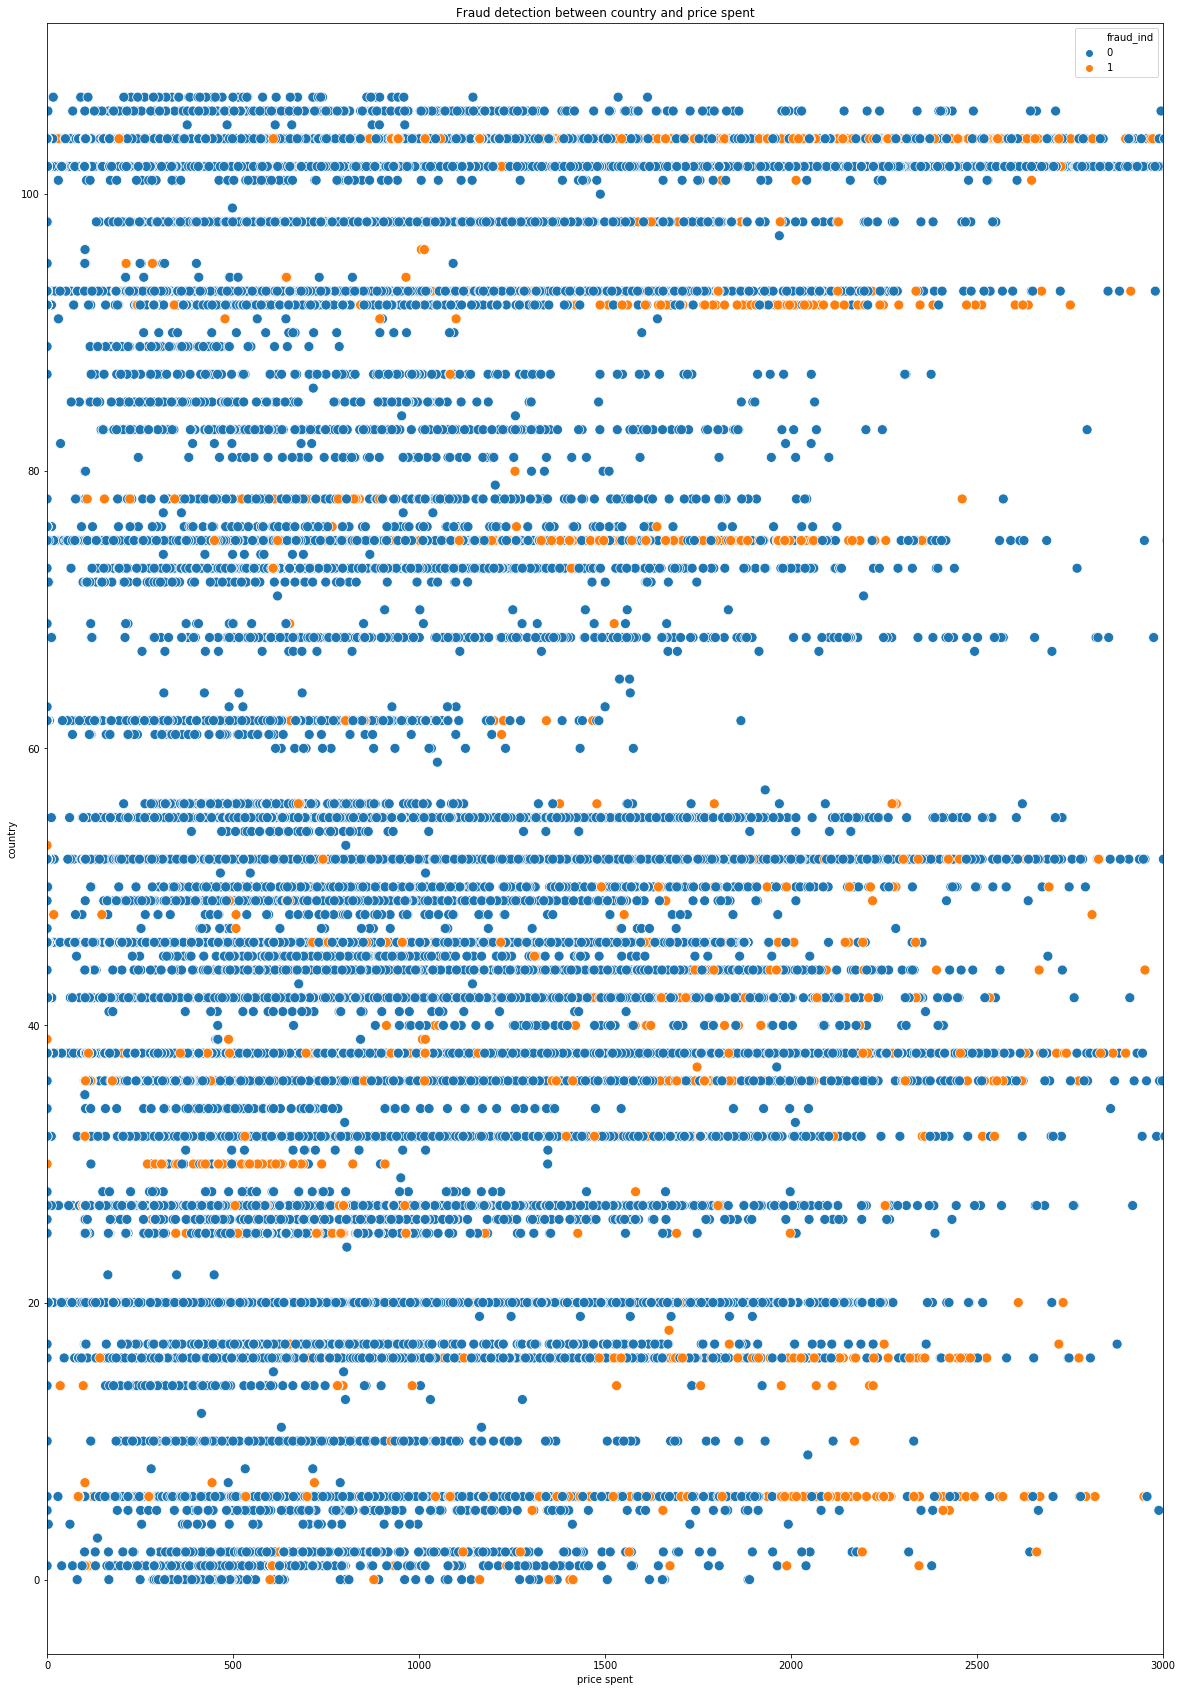

In [39]:
_ = sns.scatterplot(pro.conam, pro.stocn, hue=pro.fraud_ind, s=100);
fig = plt.gcf()
fig.set_size_inches(20,30)
plt.xlabel("price spent")
plt.ylabel("country")
plt.title("Fraud detection between country and price spent");
plt.xlim(0, 3000);

In [40]:
fraudy.bacno.value_counts()

36103     94
156870    85
159452    82
118402    79
140259    75
46582     65
77441     63
91688     62
107667    61
97832     56
134008    48
71260     42
90965     38
124951    37
50199     37
117252    35
133890    35
113564    34
8792      34
78542     34
38818     34
39511     33
68577     33
7281      32
51089     31
151836    31
48484     30
116877    30
163798    29
34663     29
          ..
58608      1
126726     1
53276      1
108595     1
32532      1
124987     1
20540      1
10307      1
10323      1
69716      1
120925     1
79629      1
106486     1
147276     1
73512      1
67521      1
14259      1
139190     1
161605     1
163770     1
155440     1
44830      1
16370      1
18381      1
133077     1
34587      1
157673     1
155630     1
157463     1
155111     1
Name: bacno, Length: 8643, dtype: int64

In [41]:
id_36103 = pro[pro.bacno==36103]
len(id_36103)

117

交易型態 支付型態 區別

In [42]:
pro.etymd.unique()

array([ 0,  2,  5,  4,  8,  1,  9,  6,  3,  7, 10])

In [43]:
pro.hcefg.unique()

array([5, 0, 3, 1, 2, 7, 8, 9, 6])

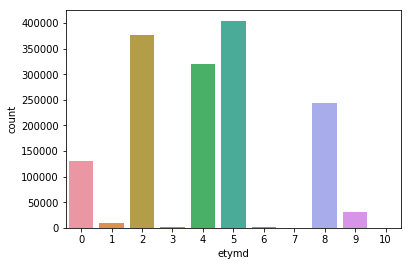

In [44]:
sns.countplot(pro.etymd)

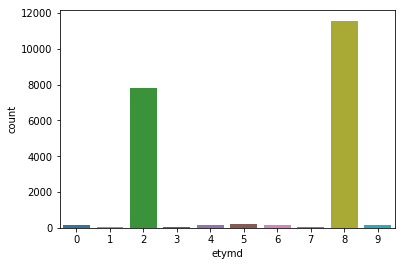

In [45]:
sns.countplot(fraudy.etymd)

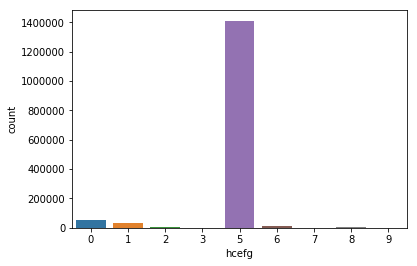

In [46]:
sns.countplot(pro.hcefg)

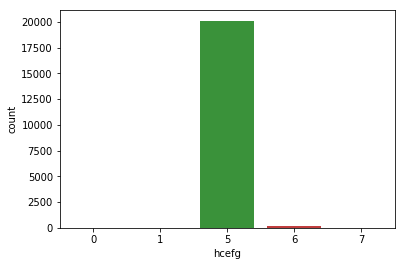

In [47]:
sns.countplot(fraudy.hcefg)

In [48]:
磁條交易 fallback VS ecfg

SyntaxError: invalid syntax (<ipython-input-48-6f45a9d36d4a>, line 1)

In [49]:
pro.flbmk.unique()

array(['N', 'Y', nan], dtype=object)

In [50]:
pro.flbmk.value_counts()

N    1504133
Y       5073
Name: flbmk, dtype: int64

In [51]:
fraudy.flbmk.value_counts()

N    20073
Y       87
Name: flbmk, dtype: int64

In [52]:
flg_3dsmk 簡訊交易

SyntaxError: invalid syntax (<ipython-input-52-6beca0fc84e8>, line 1)

In [53]:
pro.flg_3dsmk.unique()

array(['N', 'Y', nan], dtype=object)

In [54]:
pro.flg_3dsmk.value_counts()

N    1444867
Y      64339
Name: flg_3dsmk, dtype: int64

In [55]:
fraudy.flg_3dsmk.value_counts()

N    20060
Y      100
Name: flg_3dsmk, dtype: int64

In [56]:
pro.ovrlt.value_counts()

N    1501536
Y      20251
Name: ovrlt, dtype: int64

In [57]:
fraudy.ovrlt.value_counts()

N    19720
Y      635
Name: ovrlt, dtype: int64

Groupby country, city, money_spent, fraud

In [58]:
country = pd.DataFrame({'country':pro.stocn, 'city':pro.scity, 'money_spent':pro.conam, 'fraud':pro.fraud_ind})

In [59]:
country.head()

country  city  money_spent  fraud
0      102     0       513.80      0
1      102  5817       465.62      0
2      102     0       513.80      0
3      102  3281      1016.11      0
4      102  5817       713.66      0

From the groupby we can realized that one city can belong to multi country

In [60]:
country.groupby(['country', 'city'])['fraud'].sum().head(30)

country  city
0        0         0
         41        0
         475       0
         595       0
         621       2
         1120      2
         2059      0
         2453      0
         2541      0
         3144      1
         3260      0
         3864      0
         3870      0
         4313      0
         4713      0
         4801      0
         5210      0
         5320      2
         5321      0
         5324      0
         6566      0
1        0       155
2        0         0
         136       0
         219       0
         255       0
         256       0
         258       0
         260       0
         1584      0
Name: fraud, dtype: int64

By printing out the value counts of fraud in each city we can see that some city have extreme high percentage of fraud 

In [61]:
city = country.groupby(['city'])['fraud'].sum().sort_values(ascending=False)

If a city belong to multiple countries ranked it. percentage of total fraud in each cities

In [62]:
(city / len(pro)).sort_values

<bound method Series.sort_values of city
6580    0.003717
3460    0.001762
6593    0.001015
1337    0.000725
0       0.000526
5817    0.000458
5320    0.000340
621     0.000315
5932    0.000219
1803    0.000171
6576    0.000156
1034    0.000123
4528    0.000093
955     0.000091
1060    0.000091
3150    0.000069
376     0.000066
668     0.000066
3441    0.000059
5324    0.000058
327     0.000053
1574    0.000051
5776    0.000051
1300    0.000049
5820    0.000048
4099    0.000047
2138    0.000047
3199    0.000044
6049    0.000042
595     0.000042
          ...   
4310    0.000000
4297    0.000000
4311    0.000000
4312    0.000000
4314    0.000000
4315    0.000000
4318    0.000000
4320    0.000000
4321    0.000000
4298    0.000000
4296    0.000000
4270    0.000000
4279    0.000000
4271    0.000000
4272    0.000000
4273    0.000000
4275    0.000000
4276    0.000000
4277    0.000000
4278    0.000000
4281    0.000000
4294    0.000000
4282    0.000000
4286    0.000000
4287    0.000000
4288   

I was first assuming that if a city show up under different countries, they must be fraud. but the result is not what I assumed. A city can belong to different country and have both fraud and non-fraud transcation. 

I am thinking about using the percentage of fraud to replace the city code???

In [63]:
country[country.city==6580].sort_values('country')

country  city  money_spent  fraud
10851         16  6580       143.64      0
68            38  6580         0.00      0
998811        38  6580       298.10      0
998834        38  6580         0.00      0
998839        38  6580         0.00      1
998886        38  6580       407.87      0
998956        38  6580       168.20      0
998998        38  6580         0.00      0
999003        38  6580       412.32      0
999032        38  6580       288.05      0
999036        38  6580       786.97      0
999107        38  6580         0.00      0
999141        38  6580       155.07      0
999150        38  6580       706.49      0
999225        38  6580         0.00      0
999227        38  6580       168.20      0
998775        38  6580         0.00      0
998766        38  6580       309.62      0
998731        38  6580       168.20      0
998716        38  6580         0.00      0
998224        38  6580         0.00      1
998231        38  6580         0.00      0
998253        38  6580       356.47      1
998261        38  6580       680.57      0
998306        38  6580      1029.88      0
998340        38  6580       407.87      0
998359        38  6580       288.05      0
999315        38  6580       288.05      0
998389        38  6580       175.31      0
998404        38  6580       103.48      0
...          ...   ...          ...    ...
573248       104  6580       944.62      1
915765       104  6580       977.05      1
1312471      104  6580       284.43      0
573150       104  6580       946.70      0
1312425      104  6580       805.27      1
206702       104  6580       651.04      0
205658       104  6580       940.27      1
574442       104  6580       943.22      1
1314337      104  6580       945.02      0
203367       104  6580       938.22      1
912984       104  6580       827.00      0
913044       104  6580        62.39      0
913201       104  6580      1174.92      1
913208       104  6580       999.22      0
203672       104  6580       970.91      1
1315903      104  6580       948.36      0
913432       104  6580       803.81      1
913755       104  6580      1018.11      0
575641       104  6580       953.83      1
204074       104  6580       939.26      1
1315295      104  6580       288.04      0
914034       104  6580       944.13      1
575274       104  6580       809.88      1
914184       104  6580       946.34      1
575052       104  6580       439.23      1
574913       104  6580       946.17      1
205396       104  6580       979.15      1
574655       104  6580       942.15      1
1316672      104  6580       946.38      0
735234       104  6580       416.00      0

[41179 rows x 4 columns]

In [64]:
country[country.city==6580].sort_values('money_spent')

country  city  money_spent  fraud
68            38  6580         0.00      0
818206        38  6580         0.00      0
818041        38  6580         0.00      0
173169        38  6580         0.00      0
338605        38  6580         0.00      0
817852        38  6580         0.00      0
817650        38  6580         0.00      0
173024        38  6580         0.00      0
338730        38  6580         0.00      0
817586        38  6580         0.00      0
338802        38  6580         0.00      0
173285        38  6580         0.00      0
1170235       38  6580         0.00      0
1170338       38  6580         0.00      0
338864        38  6580         0.00      0
338903        38  6580         0.00      0
817430        38  6580         0.00      0
1170556       38  6580         0.00      0
817175        38  6580         0.00      0
172673        38  6580         0.00      0
817050        38  6580         0.00      0
816604        38  6580         0.00      1
1171013       38  6580         0.00      0
817547        38  6580         0.00      0
1171096       38  6580         0.00      0
1169258       38  6580         0.00      0
173369        38  6580         0.00      0
173988        38  6580         0.00      0
821040        38  6580         0.00      0
820969        38  6580         0.00      0
...          ...   ...          ...    ...
1357493       38  6580      1202.35      0
1317008       38  6580      1202.35      1
816371        38  6580      1202.35      0
1307121      104  6580      1208.51      1
602240        38  6580      1209.16      1
402045        38  6580      1209.16      0
1063902       38  6580      1209.16      0
860309        38  6580      1221.03      0
1487738       38  6580      1221.03      0
949589        38  6580      1221.03      0
197882        38  6580      1273.09      0
1329684       38  6580      1273.75      0
1490761       38  6580      1276.38      0
1072639       38  6580      1276.38      0
683983        38  6580      1291.83      0
469279        38  6580      1291.83      0
538790        38  6580      1291.83      0
1030111       38  6580      1291.83      0
638050        38  6580      1291.83      0
652160        38  6580      1291.83      0
1473764       38  6580      1291.83      0
390501        38  6580      1292.46      0
1055414       38  6580      1292.46      0
491211        38  6580      1328.48      0
1187110       38  6580      1462.89      0
1272724      104  6580      1780.74      1
426512       104  6580      1835.75      0
995625       104  6580      1844.69      0
1210443      104  6580      1844.69      0
601888       104  6580      2012.56      0

[41179 rows x 4 columns]

In [65]:
country[country.city==6580]

country  city  money_spent  fraud
68            38  6580         0.00      0
407           38  6580         0.00      0
443           38  6580         0.00      0
1128          38  6580       407.87      0
1632          38  6580         0.00      0
1977          38  6580       216.12      0
2171          38  6580       407.87      0
2682          38  6580         0.00      0
3328          38  6580         0.00      0
3339          38  6580        39.24      0
3352          38  6580       524.74      0
3589          38  6580       125.55      0
3647          38  6580        75.43      0
4056          38  6580       941.38      0
4083          38  6580         0.00      1
4123          38  6580         0.00      0
4210          38  6580       701.45      0
4347          38  6580       490.68      0
4420          38  6580      1016.34      1
4574          38  6580       175.31      0
4714          38  6580       407.87      1
4813          38  6580       821.02      0
5457          38  6580       103.48      0
5711          38  6580       229.88      0
5975          38  6580       236.43      0
6264          38  6580       885.90      0
6827          38  6580       466.14      0
7183          38  6580         0.00      0
7583         104  6580       966.55      1
7594          38  6580       652.61      0
...          ...   ...          ...    ...
1521298       38  6580       168.20      0
1521306       38  6580       236.43      0
1521324       38  6580       236.43      0
1521327       38  6580       307.74      0
1521361       38  6580       288.05      0
1521376       38  6580       944.11      0
1521396       38  6580      1037.59      0
1521404       38  6580       168.20      0
1521406       38  6580       168.20      0
1521420      104  6580       262.74      0
1521435       38  6580       407.87      0
1521463       38  6580       796.90      0
1521475       38  6580      1016.34      1
1521497       38  6580       288.05      0
1521513       38  6580       168.20      0
1521516       38  6580       298.10      0
1521517      104  6580       943.91      1
1521549       38  6580       168.20      0
1521550       38  6580       696.35      1
1521552       38  6580       111.17      1
1521566       38  6580       288.05      0
1521568       38  6580       183.84      0
1521593       38  6580       298.10      0
1521599       38  6580         0.00      0
1521645       38  6580       168.20      0
1521657       38  6580       837.78      0
1521712       38  6580       111.17      1
1521723       38  6580       944.11      0
1521750       38  6580         0.00      0
1521751       38  6580      1016.34      1

[41179 rows x 4 columns]

In [66]:
country[country.city==3460].country.unique()

array([46])

In [67]:
country[country.city==6593].country.unique()

array([75])

In [68]:
country[country.city==0].country.unique()

array([102, 104,  52,  75,   1,  55,   2,  20,   6,  93,  42,  98,  32,
        50,  49,  25, 106,  54,  46,  45,  36,  68,  92,  60,  17, 101,
        38,  64,  77,  27,  73,  48,  16,   0,  26,  83,  88])

In [69]:
country[country.city==1337].country.unique()

array([104])

In [70]:
country[country.city==5817].country.unique()

array([102,  52])

In [71]:
country[(country.city==5817) & (country.country==102)].fraud.sum()

695

In [72]:
country.country.value_counts().head()

102    1313475
38       44311
46       41677
104      33496
75       20128
Name: country, dtype: int64

In [73]:
len(country[(country.city==5817) & (country.country==102)])

726391

In [74]:
len(country[(country.city==5817) & (country.country==52)])

55

In [75]:
country[(country.city==5817) & (country.country==52)].fraud.sum()

2

In [76]:
country[country.city==480].country.unique()

array([104])

In [77]:
fraudy[fraudy.scity==6580].head(10)

acqic   bacno    cano    conam  contp  csmcu ecfg  etymd flbmk  \
4083   3348   62337  173073     0.00      5     62    Y      8     N   
4420   3348  103187  104380  1016.34      5     62    Y      8     N   
4714   6215  117283  180720   407.87      5     62    Y      2     N   
7583   3221   34824  130403   966.55      5     61    Y      8     N   
7691   3221   22018   65232   101.02      5     61    Y      8     N   
7712   6215   26537  124647     0.00      5     62    N      2     N   
8076   3348   70583  188016  1016.34      5     62    Y      8     N   
8156   3348   66435  165560   407.87      5     62    Y      8     N   
8268   3221    9814  172985   942.55      5     61    Y      8     N   
8506   6215  142638  118092   177.04      5     62    Y      2     N   

     flg_3dsmk  ...  iterm  locdt     loctm  mcc  mchno  ovrlt  scity  stocn  \
4083         N  ...      0     66  110626.0  380  54238      N   6580     38   
4420         N  ...      0     31  195752.0  380  54238      N   6580     38   
4714         N  ...      0     56  225316.0  380  54238      N   6580     38   
7583         N  ...      0     32   10550.0  288  55807      N   6580    104   
7691         N  ...      0     33  161735.0  288  55807      N   6580    104   
7712         N  ...      0     33  183430.0  380  54238      N   6580     38   
8076         N  ...      0     32  195855.0  380  54238      N   6580     38   
8156         N  ...      0     32   21305.0  380  54238      Y   6580     38   
8268         N  ...      0     34    4721.0  288  55807      N   6580    104   
8506         N  ...      0     32   12139.0  380  54238      N   6580     38   

     stscd    txkey  
4083     0   749204  
4420     0   691033  
4714     0  1893057  
7583     0   691474  
7691     0   694967  
7712     0  1868001  
8076     0   692930  
8156     0   691620  
8268     0   696277  
8506     0  1865977  

[10 rows x 23 columns]

In [78]:
top_fraud_city = city.head(50)

In [79]:
top_fraud_city.sum()

16998

In [80]:
country_fraud = country[country.fraud==1]
#country_fraud

In [81]:
top_city_fraud = country_fraud.groupby(['city'])['fraud'].sum().sort_values(ascending=False).head(50)

In [82]:
fifty_city = list(top_city_fraud.index.values)
#fifty_city

In [83]:
for i in country_fraud.index:
    if country_fraud.city.loc[i] not in fifty_city:
        country_fraud = country_fraud.drop([i])

I now pick the top 50 fraud transaction cities and see if there are any pattern between the city and the amount of money

There indeed have some pattern like city 1337, that all the fraud transactions are within a certain amount of money spent. Q: If we really detailed the amount range for each city, I am worried about overfitting.

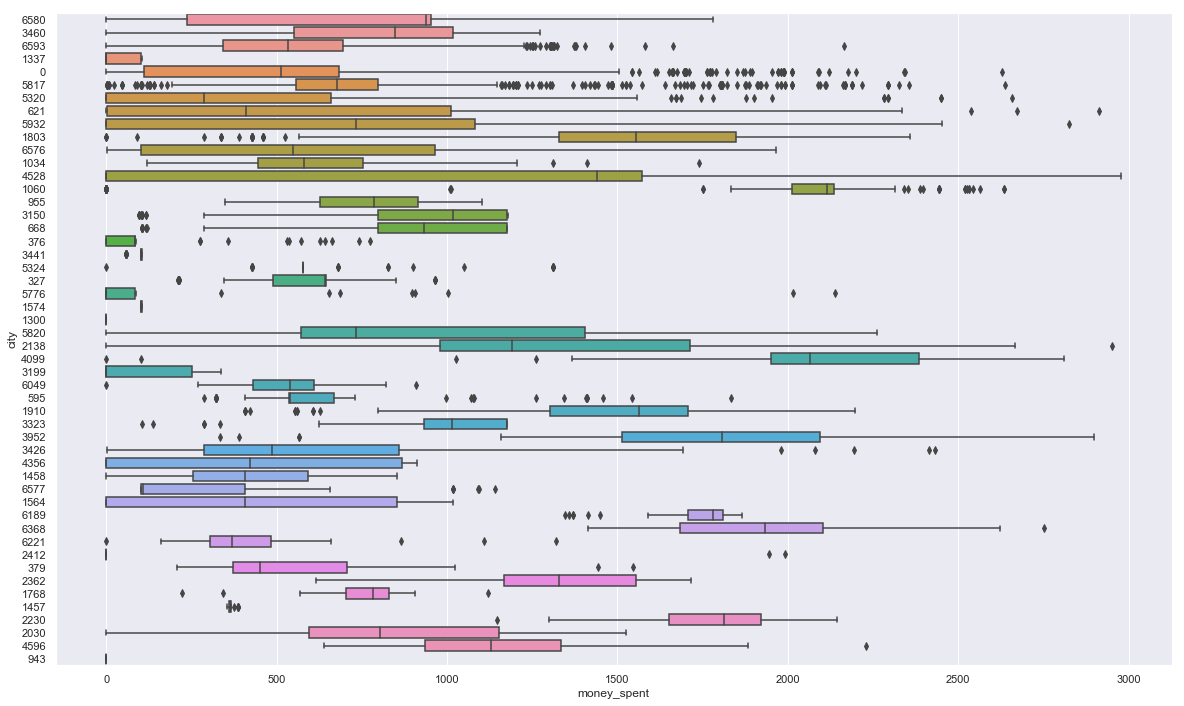

In [84]:
sns.set(rc={'figure.figsize':(20,12)})
sns.boxplot(country_fraud.money_spent, country_fraud.city, orient='h', order=fifty_city)

Conclusion: Might can drop the country column since it really is distracting, the city column is more specialized and we might turn that column into a percentage column, cannot really find a pattern for fraud money spent yet.


average every ID, and a new column of 100%, if there is an amount greater than > 100% mark it and see if it belongs to the fraud transaction set

the most frequent fraud transaction ID, and see if there is any hidden variable

In [85]:
pro.head()

acqic   bacno    cano    conam  contp  csmcu ecfg  etymd flbmk flg_3dsmk  \
0   6881  113261   38038   513.80      5      0    N      0     N         N   
1      0  134508   45725   465.62      5      0    N      2     N         N   
2   6881   15408  188328   513.80      5      0    N      0     N         N   
3   6716  157159   29967  1016.11      5     62    N      5     N         N   
4   5975  105985   81305   713.66      5     62    N      4     N         N   

   ...  iterm  locdt     loctm  mcc  mchno  ovrlt  scity  stocn stscd    txkey  
0  ...      0     33  172652.0  457  59333      N      0    102     0   516056  
1  ...      0      9  105114.0  451      0      N   5817    102     0     4376  
2  ...      0      6  152458.0  457  59333      N      0    102     0   483434  
3  ...      0      5  172946.0  247  50436      N   3281    102     0  1407164  
4  ...      0      6  182129.0  263  93775      N   5817    102     0  1051004  

[5 rows x 23 columns]

In [86]:
pro.groupby('bacno')['fraud_ind'].sum().sort_values(ascending=False)

bacno
36103     94
156870    85
159452    82
118402    79
140259    75
46582     65
77441     63
91688     62
107667    61
97832     56
134008    48
71260     42
90965     38
50199     37
124951    37
117252    35
133890    35
113564    34
38818     34
78542     34
8792      34
39511     33
68577     33
7281      32
51089     31
151836    31
48484     30
116877    30
163798    29
34663     29
          ..
106752     0
106753     0
106754     0
106758     0
106759     0
106760     0
106761     0
106734     0
106729     0
106698     0
106715     0
106699     0
106703     0
106704     0
106705     0
106707     0
106710     0
106711     0
106713     0
106717     0
106728     0
106718     0
106719     0
106720     0
106721     0
106722     0
106723     0
106724     0
106727     0
1          0
Name: fraud_ind, Length: 95214, dtype: int64

In [87]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [88]:
pro[pro.bacno==36103].sort_values('loctm')

acqic  bacno    cano    conam  contp  csmcu ecfg  etymd flbmk  \
235636    3207  36103  100698   426.47      5     62    Y      8     N   
71110     5818  36103  100698     0.00      4     61    N      2     N   
978865    3207  36103  100698   578.02      5     62    Y      8     N   
1043469   3207  36103  100698   578.02      5     62    Y      8     N   
746916    3207  36103  100698   578.02      5     62    Y      8     N   
979278    3207  36103  100698   578.02      5     62    Y      8     N   
1115093   3207  36103  100698   578.02      5     62    Y      8     N   
61400     3207  36103  100698   578.02      5     62    Y      8     N   
817954    3207  36103  100698   426.47      5     62    Y      8     N   
638077    3207  36103  100698   578.02      5     62    Y      8     N   
1338322   3207  36103  100698   578.02      5     62    Y      8     N   
1463133   3207  36103  100698   578.02      5     62    Y      8     N   
76330     3207  36103  100698   578.02      5     62    Y      8     N   
1416749   3207  36103  100698   426.47      5     62    Y      8     N   
392531    3207  36103  100698   578.02      5     62    Y      8     N   
733037    3207  36103  100698   578.02      5     62    Y      8     N   
601872    3207  36103  100698   680.57      5     62    Y      8     N   
501499    3207  36103  100698   578.02      5     62    Y      8     N   
362792    3207  36103  100698   426.47      5     62    Y      8     N   
1150348   3207  36103  100698   426.47      5     62    Y      8     N   
1090819   3207  36103  100698   578.02      5     62    Y      8     N   
640934    3207  36103  100698   578.02      5     62    Y      8     N   
1348964   5970  36103  100698  2293.15      5     62    N      4     N   
1243228   3348  36103  100698   366.38      5     62    Y      8     N   
17181     3348  36103  100698   504.76      5     62    Y      8     N   
99777     3348  36103  100698   504.76      5     62    Y      8     N   
548823    3348  36103  100698   578.02      5     62    Y      8     N   
1145365   3207  36103  100698   578.02      5     62    Y      8     N   
145151    5970  36103  100698  2060.45      5     62    N      4     N   
1012107   5970  36103  100699  2401.05      5     62    N      4     N   
1085944   5970  36103  100698  2375.98      5     62    N      4     N   
203145       0  36103  100698   465.62      5      0    N      2     N   
746959    3207  36103  100698   578.02      5     62    Y      8     N   
428208       0  36103  100698   465.62      5      0    N      2     N   
1126393   3207  36103  100698   578.02      5     62    Y      8     N   
1293751   6779  36103  100698  1612.54      5     62    N      4     N   
1494235   3207  36103  100698   578.02      5     62    Y      8     N   
713236    3207  36103  100698   578.02      5     62    Y      8     N   
781175    3348  36103  100698   103.48      5     62    Y      8     N   
1314335   3348  36103  100698   103.48      5     62    Y      8     N   
204661    3207  36103  100698   578.02      5     62    Y      8     N   
808042    3207  36103  100698   578.02      5     62    Y      8     N   
1334580   3207  36103  100698   578.02      5     62    Y      8     N   
1273656   6779  36103  100699  1853.81      5     62    N      4     N   
1194565   3207  36103  100698   578.02      5     62    Y      8     N   
558359    3207  36103  100698   578.02      5     62    Y      8     N   
1186044   3207  36103  100698   578.02      5     62    Y      8     N   
746468    5975  36103   49348   684.58      5     62    N      4     N   
1219154   3207  36103  100698   578.02      5     62    Y      8     N   
338920    3207  36103  100698   578.02      5     62    Y      8     N   
340579    3207  36103  100698   578.02      5     62    Y      8     N   
1127418   3207  36103  100698   578.02      5     62    Y      8     N   
1217941   3207  36103  100698   578.02      5     62    Y      8     N   
645583    334

In [89]:
pro.conam.value_counts()

513.80     131026
465.62      47667
0.00        46373
683.25      20135
407.87      10974
103.48      10679
1.38         9660
288.05       8428
592.25       6668
1016.34      6507
555.43       5908
229.88       5729
216.12       5299
794.93       5017
168.20       4918
884.33       4577
334.56       4457
680.57       4339
652.61       4218
254.99       3861
317.01       3722
366.38       3690
551.51       3614
625.35       3572
622.19       3488
796.90       3481
1017.48      3437
460.34       3419
732.99       3364
443.90       3229
287.02       3144
426.47       3054
655.51       3005
490.68       2993
609.21       2767
298.10       2706
531.12       2680
766.30       2630
228.54       2604
881.18       2570
401.39       2547
591.90       2488
513.36       2485
373.76       2473
465.09       2440
772.62       2402
703.98       2389
201.39       2377
682.99       2371
149.14       2369
555.04       2354
387.93       2281
588.75       2263
677.88       2222
333.71       2203
342.90    

In [90]:
fraudy.conam.value_counts()

0.00       2573
1016.34    1985
103.48      405
513.80      212
288.05      208
407.87      201
814.14      135
794.93      121
1.38        117
236.43      112
696.35      112
677.88      107
102.61      104
155.07      103
216.12       91
0.08         88
1174.97      85
168.20       84
578.02       75
683.25       75
551.51       65
605.25       57
1050.50      56
682.99       56
652.61       56
417.33       55
101.74       50
102.40       47
1017.48      47
426.47       45
118.51       45
490.68       43
555.43       42
944.61       41
796.90       41
605.08       41
932.13       41
229.88       41
734.15       40
102.37       38
0.07         37
941.38       36
366.38       36
622.19       36
149.14       36
945.48       34
954.83       32
100.83       32
713.91       32
420.41       32
443.90       32
2139.30      30
102.32       30
543.51       30
524.74       29
102.45       29
943.22       29
938.22       29
938.18       28
317.01       28
342.90       28
1202.35      28
766.30  

cities with single countries:

In [170]:
country_city = country.groupby(['city','country'])['fraud'].sum()

In [171]:
country_city

city  country
0     0             0
      1           155
      2             0
      6             2
      16            0
      17            0
      20           11
      25            5
      26            0
      27            3
      32            5
      36            0
      38            0
      42            1
      45            0
      46            2
      48            0
      49            0
      50            0
      52          112
      54            0
      55            1
      60            0
      64            0
      68            0
      73            0
      75           18
      77            0
      83            0
      88            0
      92            0
      93           18
      98            4
      101           0
      102         187
      104         277
      106           0
1     93            0
3     75            0
5     38            1
6     38            1
7     38            1
8     38            3
11    25            1
12    38          

In [181]:
single_country = []
multi_country = []

for i in country_city.index.get_level_values(0).unique():
    if len(country_city[i].index) > 1:
        multi_country.append(i)
    else:
        single_country.append(i)

In [236]:
country.head(100)

country  city  money_spent  fraud
0       102     0       513.80      0
1       102  5817       465.62      0
2       102     0       513.80      0
3       102  3281      1016.11      0
4       102  5817       713.66      0
5       102  5817       465.62      0
6       102  5865      1806.49      0
7       102  5817       526.88      0
8       102  3585       201.39      0
9       102  5817       465.62      0
10      102     0         0.00      0
11      102  5817       465.62      0
12      102     0       513.80      0
13      102     0       513.80      0
14      102     0         0.00      0
15      102  5817       465.62      0
16      102  5820       930.31      0
17       44  2138         0.00      0
18      102     0       513.80      0
19      102     0       513.80      0
20      102     0         0.00      0
21      102  5817       465.62      0
22      102     0       513.80      0
23      102     0       683.25      0
24      102     0       513.80      0
25      102  3588       298.10      0
26      102     0       513.80      0
27      102     0       513.80      0
28       14  5356       747.35      0
29      102  5817       465.62      0
30      102  5817       500.14      0
31      102     0       513.80      0
32      102     0       513.80      0
33      102  5817      1397.22      0
34      102  5817       465.62      0
35      102  5817       465.62      0
36      102  3588       942.75      0
37      102  5817       465.62      0
38      102     0       513.80      0
39      102     0       513.80      0
40      102  5817       551.90      0
41      102     0       513.80      0
42      102     0       513.80      0
43      102  5817       998.07      0
44       46  3460       103.48      0
45      102     0       513.80      0
46      102     0       513.80      0
47      102  5817       465.62      0
48      102  5817       683.25      0
49      102  5817       465.62      0
50      102  5817       116.10      0
51      102     0       513.80      0
52      102  5817       465.62      0
53      102  5817       465.62      0
54      102  5859       691.17      0
55      102     0       513.80      0
56      102     0       513.80      0
57      102  5817       465.62      0
58      102     0       513.80      0
59      102  5817       465.62      0
60      102     0       513.80      0
61      102  5817       630.67      0
62      102  5817       465.62      0
63      102     0       513.80      0
64      102  5817       625.35      0
65      102  5817       938.23      0
66      102     0       513.80      0
67      102  5817       584.85      0
68       38  6580         0.00      0
69      102     0       513.80      0
70       93   621         1.38      1
71      102  5817       742.17      0
72       46  6577       558.15      0
73      102  5817       465.62      0
74      102  5817       320.62      0
75      102  5817       487.78      0
76      102  5817       465.62      0
77      102  5817       465.09      0
78      102  5859       728.31      0
79      102  5817       868.32      0
80      102     0       513.80      0
81      102  5817       841.46      0
82      102  5820       438.78      0
83      102     0       513.80      0
84      102     0       513.80      0
85      102     0       513.80      0
86      102  5817       821.02      0
87      102  5817       465.62      0
88      102     0       513.80      0
89      104  1661         0.00      0
90      102     0       513.80      0
91      102  5812       599.14      0
92      102  2310       707.98      0
93      102     0       513.80      0
94      102  5800       278.62      0
95      102     0       513.80      0
96      102     0       513.80      0
97      102  5820       490.68      0
98      102  5817       465.62      0
99      102     0       513.80      0

In [245]:
multi_country_fraud = []
for i in country.index:
    if country.city.iloc[i] in multi_country:
        multi_country_fraud.append(country.fraud.iloc[i])

In [248]:
single_country_fraud = []
for i in country.index:
    if country.city.iloc[i] in single_country:
        single_country_fraud.append(country.fraud.iloc[i])

In [246]:
sum(multi_country_fraud)

9931

In [247]:
sum(multi_country_fraud)/len(multi_country_fraud)

0.010546347752303661

In [249]:
sum(single_country_fraud)

10424

In [250]:
sum(single_country_fraud)/len(single_country_fraud)

0.017968262504869565

same amount of money spent too frequent in same sccount

In [280]:
pro.conam.value_counts().values

array([131026,  47667,  46373, ...,      1,      1,      1])

In [281]:
fraudy.conam.value_counts().values

array([2573, 1985,  405, ...,    1,    1,    1])

In [300]:
money_spent = pro.groupby(['conam'])['fraud_ind'].agg(['count','mean'])

In [306]:
money_spent.sort_values('count',ascending=False).head(50)

count      mean
conam                    
513.80   131026  0.001618
465.62    47667  0.000147
0.00      46373  0.055485
683.25    20135  0.003725
407.87    10974  0.018316
103.48    10679  0.037925
1.38       9660  0.012112
288.05     8428  0.024680
592.25     6668  0.000900
1016.34    6507  0.305056
555.43     5908  0.007109
229.88     5729  0.007157
216.12     5299  0.017173
794.93     5017  0.024118
168.20     4918  0.017080
884.33     4577  0.004588
334.56     4457  0.001795
680.57     4339  0.004379
652.61     4218  0.013276
254.99     3861  0.006734
317.01     3722  0.007523
366.38     3690  0.009756
551.51     3614  0.017986
625.35     3572  0.001400
622.19     3488  0.010321
796.90     3481  0.011778
1017.48    3437  0.013675
460.34     3419  0.005557
732.99     3364  0.001784
443.90     3229  0.009910
287.02     3144  0.004135
426.47     3054  0.014735
655.51     3005  0.004326
490.68     2993  0.014367
609.21     2767  0.006867
298.10     2706  0.008869
531.12     2680  0.004104
766.30     2630  0.009886
228.54     2604  0.000768
881.18     2570  0.000000
401.39     2547  0.002356
591.90     2488  0.002814
513.36     2485  0.001610
373.76     2473  0.005661
465.09     2440  0.002049
772.62     2402  0.000416
703.98     2389  0.003349
201.39     2377  0.002103
682.99     2371  0.023619
149.14     2369  0.015196

In [ ]:
Function groupby BANCO 